# Models

### Input

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from datetime import datetime, timedelta


## Prescriptive Analysis

### METHOD 1 : T-1 

In [33]:
df = pd.read_csv("data/fnal_df.csv", index_col = 0)
df.sort_values(["Date", "State"], inplace = True)
df.reset_index(drop = True, inplace = True)
df

,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported
0,Alabama,2020-04-12,4903185.0,3563,93,0.0,437.0,12.26,75.99,2.61,460.30,2165
1,Alaska,2020-04-12,731545.0,272,8,66.0,31.0,11.40,45.50,2.94,1344.71,262
2,Arizona,2020-04-12,7278717.0,3542,115,0.0,0.0,0.00,48.66,3.25,578.52,1119
3,Arkansas,2020-04-12,3017804.0,1280,27,367.0,130.0,10.16,49.44,2.11,761.75,625
4,California,2020-04-12,39512223.0,22795,640,0.0,5234.0,22.96,58.14,2.81,485.42,10816
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Virginia,2020-08-31,8535519.0,120575,2580,15085.0,0.0,0.00,1412.63,2.14,18587.63,13976
7380,Washington,2020-08-31,7614893.0,74635,1915,0.0,0.0,0.00,980.12,2.57,19190.74,6058
7381,West Virginia,2020-08-31,1792147.0,10249,215,8017.0,0.0,0.00,571.88,2.10,24330.98,3577
7382,Wisconsin,2020-08-31,5822434.0,75603,1122,67234.0,0.0,0.00,1298.48,1.48,21527.46,16571


In [143]:
df[df.State == "Wyoming"]

,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported
51,Wyoming,2020-04-12,0.0,0.000000,0.000000,0.000270,0.000444,0.384675,0.007513,0.000000,0.020851,0
103,Wyoming,2020-04-13,0.0,0.000007,0.000030,0.000272,0.000456,0.387273,0.007833,0.036961,0.022905,347
155,Wyoming,2020-04-14,0.0,0.000017,0.000030,0.000276,0.000478,0.396104,0.008276,0.035934,0.022905,0
207,Wyoming,2020-04-15,0.0,0.000024,0.000030,0.000254,0.000478,0.389091,0.008596,0.035934,0.024390,15
259,Wyoming,2020-04-16,0.0,0.000037,0.000061,0.000292,0.000478,0.377403,0.009170,0.069815,0.024789,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Wyoming,2020-08-27,0.0,0.004862,0.001123,0.006030,0.002389,0.149610,0.194610,0.101643,0.259140,502
7227,Wyoming,2020-08-28,0.0,0.004961,0.001123,0.006081,0.000000,0.000000,0.198442,0.099589,0.261601,1107
7279,Wyoming,2020-08-29,0.0,0.004949,0.001123,0.006140,0.000000,0.000000,0.198002,0.099589,0.261674,1186
7331,Wyoming,2020-08-30,0.0,0.004997,0.001123,0.006179,0.000000,0.000000,0.199864,0.099589,0.261800,313


### Standardization

In [34]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[list(df.columns)[2:-1]])
for i, col in enumerate(list(df.columns)[2:-1]):
    df[col] = scaled[:, i]
df

,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported
0,Alabama,2020-04-12,0.111072,0.004624,0.002822,0.000000,0.004856,0.318442,0.014383,0.267967,0.007954,2165
1,Alaska,2020-04-12,0.003924,0.000003,0.000243,0.000130,0.000344,0.296104,0.004726,0.301848,0.025844,262
2,Arizona,2020-04-12,0.172087,0.004594,0.003489,0.000000,0.000000,0.000000,0.005727,0.333676,0.010345,1119
3,Arkansas,2020-04-12,0.062646,0.001418,0.000819,0.000723,0.001445,0.263896,0.005974,0.216632,0.014052,625
4,California,2020-04-12,1.000000,0.031627,0.019419,0.000000,0.058159,0.596364,0.008729,0.288501,0.008462,10816
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Virginia,2020-08-31,0.204368,0.168919,0.078284,0.029724,0.000000,0.000000,0.437747,0.219713,0.374638,13976
7380,Washington,2020-08-31,0.180722,0.104415,0.058106,0.000000,0.000000,0.000000,0.300755,0.263860,0.386838,6058
7381,West Virginia,2020-08-31,0.031166,0.014011,0.006524,0.015797,0.000000,0.000000,0.171450,0.215606,0.490816,3577
7382,Wisconsin,2020-08-31,0.134683,0.105774,0.034044,0.132481,0.000000,0.000000,0.401591,0.151951,0.434106,16571


### Model Implementation

In [60]:
X_train = df[df.Date == "2020-04-13"].iloc[:, 2:-1]
X_train

,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate
52,0.111072,0.004864,0.003004,0.000000,0.005078,0.317922,0.015536,0.272074,0.011232
53,0.003924,0.000010,0.000243,0.000167,0.000356,0.300000,0.004992,0.296715,0.025140
54,0.172087,0.004823,0.003702,0.000000,0.005834,0.368052,0.006436,0.337782,0.010689
55,0.062646,0.001601,0.000880,0.000770,0.001445,0.239481,0.007564,0.211499,0.014897
56,1.000000,0.033222,0.021665,0.000000,0.033502,0.327273,0.009648,0.306982,0.008491
57,0.133047,0.010420,0.009285,0.000000,0.016356,0.497143,0.033302,0.408624,0.012041
58,0.076709,0.018409,0.018266,0.000000,0.019557,0.341558,0.109189,0.462012,0.023782
59,0.010146,0.002089,0.001244,0.000420,0.002233,0.296883,0.047498,0.239220,0.023197
60,0.003262,0.002366,0.001578,0.000999,0.003278,0.391948,0.078054,0.273101,0.029982
61,0.536787,0.029133,0.015141,0.000000,0.031480,0.059740,0.173829,0.042094,0.017335


4.0


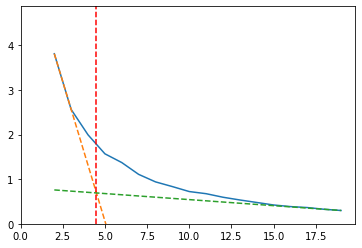

In [78]:
res = []
for k in range(2, 20):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    res.append(-model.score(X_train))

pente1 = [(res[1] - res[0])* x + res[0] for x in[i for i in range(18)]]
pente2 = [(res[17] - res[16])* (x - 17)+ res[17]for x in[i for i in range(18)]]
k_chosen = (res[17] - res[0] + 17*(res[16] - res[17]))/(res[1] - res[0] + res[16] - res[17]) + 2
print(round(k_chosen, 0))
plt.plot([i for i in range(2, 20)], res)
plt.plot([i for i in range(2, 20)], pente1, linestyle='--')
plt.plot([i for i in range(2, 20)], pente2, linestyle='--')
plt.axvline(x=k_chosen, color='red', linestyle='--', )
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [80]:
def finding_elbow(l):
    #pente1 = [(res[1] - res[0])* x + res[0] for x in[i for i in range(18)]]
    #pente2 = [(res[17] - res[16])* (x - 17)+ res[17]for x in[i for i in range(18)]]
    k_chosen = (l[17] - l[0] + 17*(l[16] - l[17]))/(l[1] - l[0] + l[16] - l[17]) + 2
    return int(round(k_chosen, 0))

In [144]:
all_dates = list(df.Date.unique())[2:]
scores = []
pred = []
for date in all_dates:
    res = []
    res.append(date)
    X_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_test = df[df.Date == date].loc[:, "TestsReported"]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    res.append(k_chosen)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        pred.append(np.mean(y_train.iloc[x]))
    res.append(r2_score(y_test, pred[-len(y_test):]))
    res.append(mean_absolute_error(y_test, pred[-len(y_test):]))
    scores.append(res)
    
df_pred = df[df.Date >= "2020-04-14"]
df_pred["Preds"] = pred
df_pred


<ipython-input-144-a5a35cff0c2b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["Preds"] = pred


,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported,Preds
104,Alabama,2020-04-14,0.111072,0.005171,0.003459,0.000000,0.005478,0.323896,0.017018,0.295688,0.012930,2942,1747.00
105,Alaska,2020-04-14,0.003924,0.000021,0.000273,0.000193,0.000356,0.291688,0.005416,0.324435,0.026893,398,400.25
106,Arizona,2020-04-14,0.172087,0.004969,0.003975,0.000491,0.006445,0.395584,0.006889,0.353183,0.010898,2575,1328.25
107,Arkansas,2020-04-14,0.062646,0.001724,0.000971,0.000841,0.001445,0.225455,0.008641,0.219713,0.015153,780,592.75
108,California,2020-04-14,1.000000,0.035223,0.023273,0.000000,0.057370,0.528831,0.010798,0.311088,0.009075,21999,7427.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Virginia,2020-08-31,0.204368,0.168919,0.078284,0.029724,0.000000,0.000000,0.437747,0.219713,0.374638,13976,14254.00
7380,Washington,2020-08-31,0.180722,0.104415,0.058106,0.000000,0.000000,0.000000,0.300755,0.263860,0.386838,6058,11986.40
7381,West Virginia,2020-08-31,0.031166,0.014011,0.006524,0.015797,0.000000,0.000000,0.171450,0.215606,0.490816,3577,4881.00
7382,Wisconsin,2020-08-31,0.134683,0.105774,0.034044,0.132481,0.000000,0.000000,0.401591,0.151951,0.434106,16571,11078.40


In [145]:
scores = pd.DataFrame(scores, columns = ["Date", "Nb Clusters", "R2", "MAE"])
scores

,Date,Nb Clusters,R2,MAE
0,2020-04-14,4,0.348365,1962.716346
1,2020-04-15,5,0.293906,2035.957692
2,2020-04-16,5,0.429234,2005.250000
3,2020-04-17,5,0.418407,2157.911538
4,2020-04-18,5,0.493018,1703.296154
...,...,...,...,...
135,2020-08-27,6,0.601174,8358.259615
136,2020-08-28,6,0.675159,6999.599359
137,2020-08-29,6,0.791371,5220.945513
138,2020-08-30,5,0.716975,6419.223077


In [146]:
scores[["Nb Clusters", "R2", "MAE"]].describe()

,Nb Clusters,R2,MAE
count,140.000000,140.000000,140.000000
mean,5.200000,0.593261,5306.125774
std,0.435807,0.163815,2215.793858
min,4.000000,0.209064,1703.296154
25%,5.000000,0.472740,3478.496154
50%,5.000000,0.624045,5205.690064
75%,5.000000,0.717235,6780.674038
max,6.000000,0.914917,10225.432692


### METHOD 2 : Previous T

In [139]:
all_dates = list(df.Date.unique())[1:]
scores = []
pred = []
for date in all_dates:
    res = []
    res.append(date)
    X_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == date)].iloc[:, 2:-1]
    y_test = df[(df.Date == date)].loc[:, "TestsReported"]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    res.append(k_chosen)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        pred.append(np.mean(y_train.iloc[x]))
    res.append(r2_score(y_test, pred[-len(y_test):]))
    res.append(mean_absolute_error(y_test, pred[-len(y_test):]))
    scores.append(res)
    
df_pred = df[df.Date >= "2020-04-13"]
df_pred["Preds"] = pred
df_pred


<ipython-input-139-faadf51e3ee9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["Preds"] = pred


,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported,Preds
52,Alabama,2020-04-13,0.111072,0.004864,0.003004,0.000000,0.005078,0.317922,0.015536,0.272074,0.011232,2626,1747.000000
53,Alaska,2020-04-13,0.003924,0.000010,0.000243,0.000167,0.000356,0.300000,0.004992,0.296715,0.025140,399,400.250000
54,Arizona,2020-04-13,0.172087,0.004823,0.003702,0.000000,0.005834,0.368052,0.006436,0.337782,0.010689,947,1328.250000
55,Arkansas,2020-04-13,0.062646,0.001601,0.000880,0.000770,0.001445,0.239481,0.007564,0.211499,0.014897,293,592.750000
56,California,2020-04-13,1.000000,0.033222,0.021665,0.000000,0.033502,0.327273,0.009648,0.306982,0.008491,9150,7427.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Virginia,2020-08-31,0.204368,0.168919,0.078284,0.029724,0.000000,0.000000,0.437747,0.219713,0.374638,13976,14247.500000
7380,Washington,2020-08-31,0.180722,0.104415,0.058106,0.000000,0.000000,0.000000,0.300755,0.263860,0.386838,6058,9250.333333
7381,West Virginia,2020-08-31,0.031166,0.014011,0.006524,0.015797,0.000000,0.000000,0.171450,0.215606,0.490816,3577,5185.000000
7382,Wisconsin,2020-08-31,0.134683,0.105774,0.034044,0.132481,0.000000,0.000000,0.401591,0.151951,0.434106,16571,10757.166667


In [140]:
scores = pd.DataFrame(scores, columns = ["Date", "Nb Clusters", "R2", "MAE"])
scores

,Date,Nb Clusters,R2,MAE
0,2020-04-13,4,0.491017,1236.995192
1,2020-04-14,4,0.516829,1627.360577
2,2020-04-15,5,0.666868,1322.392308
3,2020-04-16,5,0.783349,1216.100000
4,2020-04-17,5,0.858889,1048.469231
...,...,...,...,...
136,2020-08-27,6,0.900434,4263.307692
137,2020-08-28,6,0.669910,6215.076923
138,2020-08-29,6,0.733622,4595.458333
139,2020-08-30,6,0.629769,6416.275641


In [141]:
scores[["Nb Clusters", "R2", "MAE"]].describe()

,Nb Clusters,R2,MAE
count,141.000000,141.000000,141.000000
mean,5.361702,0.852708,2821.810229
std,0.510974,0.137680,1272.984205
min,4.000000,0.319020,729.223077
25%,5.000000,0.816085,1892.900000
50%,5.000000,0.890233,2682.826923
75%,6.000000,0.943767,3423.100000
max,6.000000,0.977836,6518.705128
